In [2]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Load the dataset
df=pd.read_csv("kaggle Projects/tit_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking null values if any
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Checking datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
#Replacing the null values of Age Column by Mean Method
mean_age=df['Age'].mean(axis=0)
df['Age'].replace(np.NaN,mean_age,inplace=True)
df['Age'].isnull().sum()

0

In [7]:
#Droping two Columns of Cabin and Embarked
df.drop('Embarked',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

#now we have cleaned our data and no null values exist in the dataframe

In [9]:
#Total Survived
Survived_count=df['Survived'].value_counts()
Survived_count

0    549
1    342
Name: Survived, dtype: int64

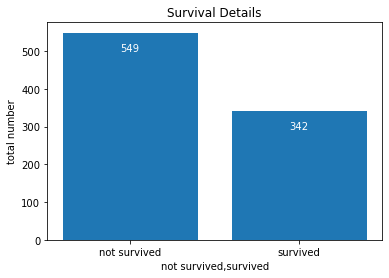

In [10]:
#bar plot of survived and not survived persons
plt.bar(Survived_count.index,Survived_count.values)
plt.title("Survival Details")
plt.xlabel("not survived,survived")
plt.xticks([0,1],['not survived','survived'])
plt.ylabel("total number")
for i,v in enumerate(Survived_count.values):
    plt.text(i,v-40,str(v),color='white',horizontalalignment='center',verticalalignment='center')

Text(0.5, 1.0, 'survived and not survived details(0 shows not survived and 1 shows survived percentage)')

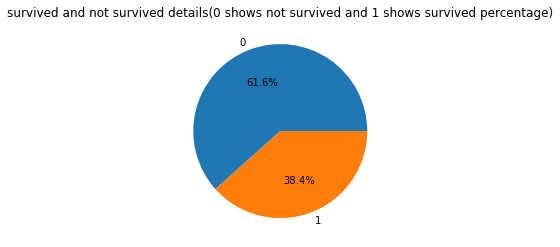

In [11]:
#pie chart of survived and not survived in percentage
plt.pie(df['Survived'].value_counts(),labels=df['Survived'].unique(),autopct='%0.1f%%',)
plt.title("survived and not survived details(0 shows not survived and 1 shows survived percentage)")


In [12]:
#Total no. of male and female on ship
sex_count=df['Sex'].value_counts()
sex_count

male      577
female    314
Name: Sex, dtype: int64

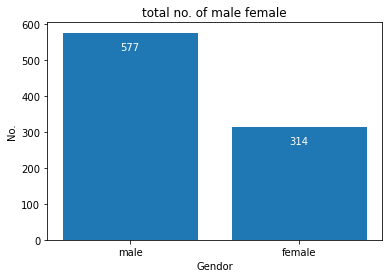

In [13]:
#Bar Plot of Total Sex Available on ship
plt.bar(sex_count.index,sex_count.values)
plt.title("total no. of male female")
plt.xlabel("Gendor")
plt.ylabel("No.")
for i,v in enumerate(sex_count.values):
    plt.text(i,v-40,str(v),color='White',horizontalalignment='center',verticalalignment='center')


In [14]:
# Finding the survival rate as per Sex
Survived_sex=df.groupby('Sex')['Survived'].sum()
Survived_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

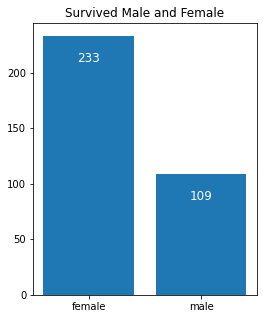

In [15]:
# ploting bar plot of survival rate as per Sex
plt.figure(figsize=(4,5))
plt.bar(Survived_sex.index,Survived_sex.values)
plt.title("Survived Male and Female")

for i,v in enumerate(Survived_sex.values):
    plt.text(i,v-20,str(v),fontsize=12,color='white',horizontalalignment='center',verticalalignment='center')
    
    


In [16]:
#Passanger avialable as per Age
Age_count=df['Age'].value_counts()
Age_count.head(40)

29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
28.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
32.000000     18
27.000000     18
26.000000     18
16.000000     17
31.000000     17
20.000000     15
33.000000     15
34.000000     15
23.000000     15
39.000000     14
17.000000     13
40.000000     13
42.000000     13
45.000000     12
38.000000     11
50.000000     10
4.000000      10
2.000000      10
44.000000      9
48.000000      9
47.000000      9
54.000000      8
9.000000       8
51.000000      7
1.000000       7
14.000000      6
49.000000      6
37.000000      6
Name: Age, dtype: int64

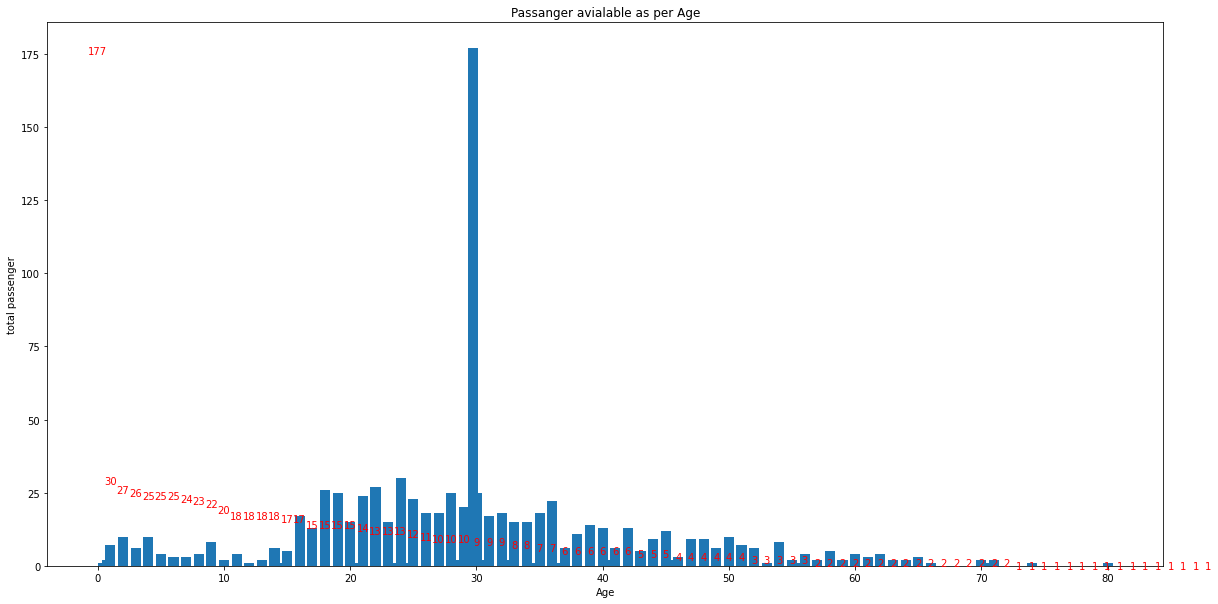

In [17]:
# Bar Plot of Passanger avialable as per Age
plt.figure(figsize=(20,10))
plt.bar(Age_count.index,Age_count.values)
plt.xlabel("Age")
plt.ylabel("total passenger")
plt.title("Passanger avialable as per Age")
for i,v in enumerate(Age_count.values):
    plt.text(i,v-1,str(v),color='red',horizontalalignment='center',verticalalignment='center')

In [18]:
#Survival Rate as per Age
survival_age=df.groupby('Age')['Survived'].sum()
survival_age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 89, dtype: int64

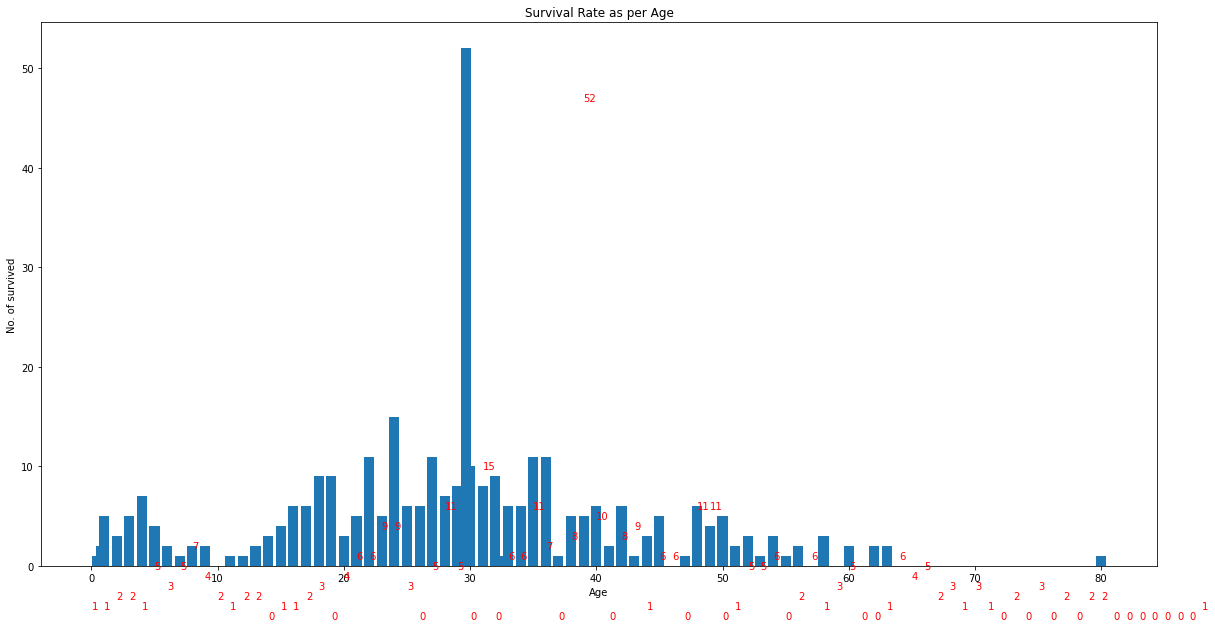

In [19]:
#bar plot of survival rate as per age
plt.figure(figsize=(20,10))
plt.bar(survival_age.index,survival_age.values)
plt.xlabel("Age")
plt.ylabel("No. of survived")
plt.title("Survival Rate as per Age")
for i,v in enumerate(survival_age.values):
    plt.text(i,v-5,str(v),color='red',verticalalignment='center')

In [20]:
#Convertng Categorical values of Sex to Numerical values
Sex_dummy=pd.get_dummies(df['Sex'])
Sex_dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
#joint of dummy variable to main dataframe
df_final=pd.concat([df,Sex_dummy],axis=1)
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,0,1


In [22]:
#Droping Sex (categorical) column
df=df_final.drop(['Sex'],axis=1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,1


In [23]:
#Defining Dependent (y) & Independent (y) variables
x=df[['PassengerId', 'Pclass', 'Age','SibSp',
       'Parch', 'Fare','female','male']]
y=df['Survived']

In [24]:
#Importing Train,test,Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("train shape",x_train.shape,y_train.shape)
print("test shape",x_test.shape,y_test.shape)


train shape (712, 8) (712,)
test shape (179, 8) (179,)


In [25]:
#Use Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# R-Squared for accuracy
lr.score(x_test,y_test)

0.8100558659217877

In [27]:
# Pedict the Test 
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1], dtype=int64)

In [28]:
# Importing Mean squared error
from sklearn.metrics import mean_squared_error

In [29]:
mse=mean_squared_error(y_test,y_pred)
print("mean_squared_error:",mse)

mean_squared_error: 0.18994413407821228


In [30]:
#Use Decision Tree Algorithm
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [31]:
# Fitting the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
#prediction
y_decpred=model.predict(x_test)

In [33]:
# Accuracy
lr.score(x_test,y_test)

0.8100558659217877

In [34]:
#MSE
mean_squared_error(y_test,y_decpred)

0.24022346368715083

In [35]:
from sklearn.svm import SVC

vr=SVC()

In [36]:
vr.fit(x_train,y_train)

SVC()

In [37]:
vr.score(x_test,y_test)

0.6927374301675978

In [38]:
# Importing Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.88268156424581

In [39]:
#Importing K fold
from sklearn.model_selection import KFold

In [40]:
kf=KFold(n_splits=3)


In [41]:
# Importing Cross val Score
from sklearn.model_selection import cross_val_score

In [42]:
# Logistic Regression using Kfold
cross_val_score(LogisticRegression(),x_train,y_train)

C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

array([0.76923077, 0.73426573, 0.78873239, 0.8028169 , 0.83098592])

In [43]:
#SVC using Cross Val Score
cross_val_score(SVC(),x_train,y_train)

array([0.62237762, 0.64335664, 0.62676056, 0.65492958, 0.64084507])

In [44]:
#RandomFores using Cross Val Score
cross_val_score(RandomForestClassifier(n_estimators=40),x_train,y_train)

array([0.75524476, 0.77622378, 0.77464789, 0.83802817, 0.81690141])

In [45]:
Importing Test dataset
test_df=pd.read_csv("kaggle Projects/test.csv")

In [46]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
#selecting Required columns
test_df=test_df[['PassengerId', 'Pclass','Age', 'SibSp','Parch','Fare','Sex']]

In [48]:
# checking null values
test_df.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex             0
dtype: int64

In [49]:
# replacing Age,Fare columns null values by mean method and dummies
age_mean=test_df['Age'].mean(axis=0)
Age=test_df.replace(np.nan,age_mean,inplace=True)
fare_mean=test_df['Fare'].mean(axis=0)
Fare=test_df.replace(np.nan,fare_mean,inplace=True)
test_df.isnull().sum()


C:\Users\jagvendra.kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
dtype: int64

In [50]:
test_df


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
0,892,3,34.50000,0,0,7.8292,male
1,893,3,47.00000,1,0,7.0000,female
2,894,2,62.00000,0,0,9.6875,male
3,895,3,27.00000,0,0,8.6625,male
4,896,3,22.00000,1,1,12.2875,female
...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,male
414,1306,1,39.00000,0,0,108.9000,female
415,1307,3,38.50000,0,0,7.2500,male
416,1308,3,30.27259,0,0,8.0500,male


In [51]:
# Converting categorical column to numerical column of sex
dummy_s=pd.get_dummies(test_df['Sex'])
dummy_s

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [52]:
# Add numerical column of sex into df dataframe and remove categrical column
test_df=pd.concat([test_df,dummy_s],axis=1)
test_df.drop('Sex',axis=1,inplace=True)
test_df


,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male
0,892,3,34.50000,0,0,7.8292,0,1
1,893,3,47.00000,1,0,7.0000,1,0
2,894,2,62.00000,0,0,9.6875,0,1
3,895,3,27.00000,0,0,8.6625,0,1
4,896,3,22.00000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1
414,1306,1,39.00000,0,0,108.9000,1,0
415,1307,3,38.50000,0,0,7.2500,0,1
416,1308,3,30.27259,0,0,8.0500,0,1


In [53]:
# prediction using Logistic regression
Survived=lr.predict(test_df)
Survived


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [55]:
#Prediction using random forest
survived_rf=rf.predict(test_df)

In [56]:
survived_rf

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
# Adding predict column to our dataset
test_df['survived_rf']=survived_rf

In [59]:
test_df.head(15)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,survived_rf
0,892,3,34.50000,0,0,7.8292,0,1,0
1,893,3,47.00000,1,0,7.0000,1,0,0
2,894,2,62.00000,0,0,9.6875,0,1,0
3,895,3,27.00000,0,0,8.6625,0,1,1
4,896,3,22.00000,1,1,12.2875,1,0,0
5,897,3,14.00000,0,0,9.2250,0,1,0
6,898,3,30.00000,0,0,7.6292,1,0,1
7,899,2,26.00000,1,1,29.0000,0,1,0
8,900,3,18.00000,0,0,7.2292,1,0,1
9,901,3,21.00000,2,0,24.1500,0,1,0


In [62]:
# Exporting to Csv file
test_df.to_csv("tit_test.csv")

In [61]:
df.to_csv("tit_train.csv")